# R1 Q10: Age-Specific Discrimination

## Reviewer Question

**Referee #1, Q10**: "Please provide age-specific discrimination analysis."

## Why This Matters

Age-specific discrimination is important for:
- Understanding model performance across different age groups
- Identifying age ranges where the model performs best/worst
- Validating that the model works across the full age spectrum

## Our Approach

We evaluate **age-stratified AUC** by considering how predictions change for people for whom we made predictions at different ages (40-50, 50-60, 60-70, etc.):

1. **Age Offset Predictions**: Use predictions made for the first 10K people with info gathered at enrollment, enrollment+1, enrollment+2, ..., enrollment+10
2. **Time Horizon Predictions**: Use predictions (0, 10, 30 years) for all people, stratified by age of prediction (i.e., age of enrollment)
3. **Enrollment Age**: The age of enrollment for everybody (all 400K) is in `baselinagefamh_withpcs.csv`

## 1. Load Data and Enrollment Ages

We load the baseline age file to get enrollment ages for all patients, which we'll use to stratify predictions by age.

In [4]:
import torch
import pandas as pd
import numpy as np
from pathlib import Path
import sys
import matplotlib.pyplot as plt
from IPython.display import Image, display

sys.path.append('/Users/sarahurbut/aladynoulli2/pyScripts')

# Load data
base_path = Path('/Users/sarahurbut/Library/CloudStorage/Dropbox-Personal/data_for_running/')
Y = torch.load(base_path / 'Y_tensor.pt', weights_only=False)
E = torch.load(base_path / 'E_matrix.pt', weights_only=False)
essentials = torch.load(base_path / 'model_essentials.pt', weights_only=False)
disease_names = essentials['disease_names']

# Load pce_df for patient demographics
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
pandas2ri.activate()
readRDS = robjects.r['readRDS']
pce_data = readRDS('/Users/sarahurbut/Library/CloudStorage/Dropbox-Personal/pce_df_prevent.rds')
pce_df = pandas2ri.rpy2py(pce_data)

# Load baseline age file for enrollment ages (all 400K patients)
baseline_path = Path('/Users/sarahurbut/Library/CloudStorage/Dropbox-Personal/baselinagefamh_withpcs.csv')
baseline_df = pd.read_csv(baseline_path)

print("="*80)
print("LOADING DATA FOR AGE-SPECIFIC ANALYSIS")
print("="*80)
print(f"Y shape: {Y.shape}")
print(f"E shape: {E.shape}")
print(f"pce_df shape: {pce_df.shape}")
print(f"baseline_df shape: {baseline_df.shape}")
print(f"\nEnrollment age column: {baseline_df.columns[baseline_df.columns.str.contains('age', case=False)].tolist()}")


LOADING DATA FOR AGE-SPECIFIC ANALYSIS
Y shape: torch.Size([407878, 348, 52])
E shape: torch.Size([407878, 348])
pce_df shape: (10000, 16)
baseline_df shape: (407878, 13)

Enrollment age column: ['age']


In [ ]:
%run /Users/sarahurbut/aladynoulli2/pyScripts/dec_6_revision/new_notebooks/pythonscripts/calculate_age_stratified_auc.py --approach pooled_retrospective --n_bootstraps 10

RESULTS ALREADY EXIST - LOADING AND DISPLAYING
Found existing results: /Users/sarahurbut/aladynoulli2/pyScripts/dec_6_revision/new_notebooks/results/age_stratified/pooled_retrospective/age_stratified_auc_results.csv

Loading results and creating visualization...

1-Year predictions: Found 30 rows

10-Year Static predictions: Found 30 rows

30-Year predictions: Found 20 rows


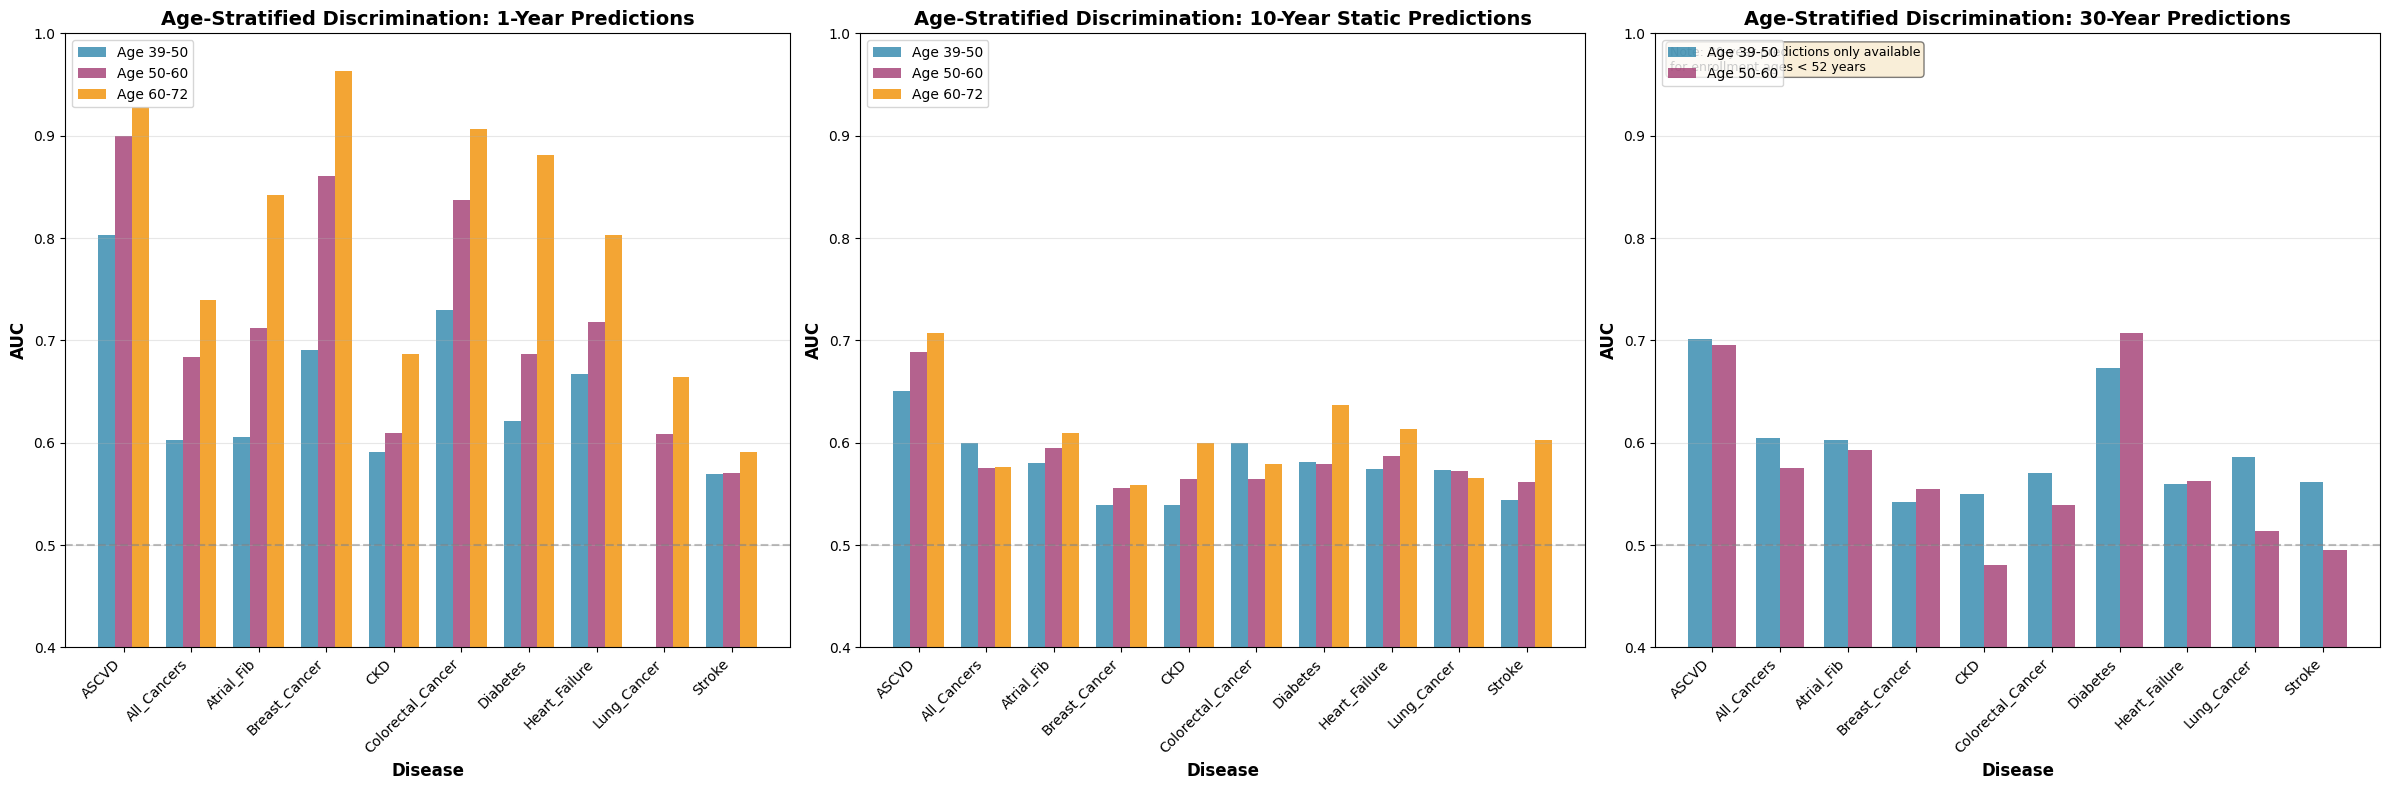


SUMMARY: AUC BY AGE GROUP (1-Year Predictions)


Age_Group,39-50,50-60,60-72
Disease,,,
ASCVD,0.803,0.900,0.928
All_Cancers,0.603,0.684,0.740
Atrial_Fib,0.606,0.712,0.842
Breast_Cancer,0.690,0.861,0.963
CKD,0.591,0.610,0.687
Colorectal_Cancer,0.729,0.837,0.907
Diabetes,0.621,0.687,0.881
Heart_Failure,0.667,0.718,0.803
Lung_Cancer,0.395,0.608,0.664



SUMMARY: AUC BY AGE GROUP (10-Year Static Predictions)


Age_Group,39-50,50-60,60-72
Disease,,,
ASCVD,0.651,0.689,0.707
All_Cancers,0.599,0.576,0.577
Atrial_Fib,0.580,0.595,0.609
Breast_Cancer,0.540,0.556,0.559
CKD,0.539,0.565,0.600
Colorectal_Cancer,0.599,0.565,0.579
Diabetes,0.581,0.579,0.637
Heart_Failure,0.574,0.587,0.614
Lung_Cancer,0.574,0.573,0.566



SUMMARY: AUC BY AGE GROUP (30-Year Predictions)
(Note: 30-year predictions only available for enrollment ages < 52 years)


Age_Group,39-50,50-60
Disease,,
ASCVD,0.702,0.695
All_Cancers,0.604,0.576
Atrial_Fib,0.603,0.593
Breast_Cancer,0.542,0.554
CKD,0.550,0.480
Colorectal_Cancer,0.570,0.539
Diabetes,0.673,0.707
Heart_Failure,0.560,0.563
Lung_Cancer,0.586,0.513



Total results: 252 disease-horizon-age combinations
Age groups: ['39-50', '50-60', '60-72']
Time horizons: ['10yr_static', '1yr', '30yr']


In [5]:
# Calculate age-stratified AUC for 1-year, 10-year static, and 30-year predictions
# Check if results already exist, otherwise run calculation

# Results path (relative to notebook directory)
results_path = Path('/Users/sarahurbut/aladynoulli2/pyScripts/dec_6_revision/new_notebooks/results/age_stratified/pooled_retrospective/age_stratified_auc_results.csv')

if results_path.exists():
    print("="*80)
    print("RESULTS ALREADY EXIST - LOADING AND DISPLAYING")
    print("="*80)
    print(f"Found existing results: {results_path}")
    print("\nLoading results and creating visualization...")
    
    # Load results
    results_df = pd.read_csv(results_path)
    
    # Create visualization: AUC by age group for key diseases
    key_diseases = ['ASCVD', 'Diabetes', 'Atrial_Fib', 'CKD', 'All_Cancers', 'Stroke', 
                    'Heart_Failure', 'Colorectal_Cancer', 'Breast_Cancer', 'Lung_Cancer']
    
    # Create plots for 1-year, 10-year static, and 30-year predictions
    time_horizons = ['1yr', '10yr_static', '30yr']
    horizon_labels = {'1yr': '1-Year', '10yr_static': '10-Year Static', '30yr': '30-Year'}
    
    fig, axes = plt.subplots(1, 3, figsize=(24, 8))
    
    for plot_idx, horizon in enumerate(time_horizons):
        # Filter to key diseases and current time horizon
        plot_data = results_df[
            (results_df['Disease'].isin(key_diseases)) & 
            (results_df['Time_Horizon'] == horizon)
        ].copy()
        
        # For 30-year, only show 40-50 and 50-60 age groups (60-70 doesn't have 30-year data)
        if horizon == '30yr':
            plot_data = plot_data[plot_data['Age_Group'].isin(['39-50', '50-60'])].copy()
            age_groups_to_plot = ['39-50', '50-60']
        else:
            age_groups_to_plot = ['39-50', '50-60', '60-72']
        
        print(f"\n{horizon_labels[horizon]} predictions: Found {len(plot_data)} rows")
        
        if len(plot_data) > 0:
            # Create pivot table for easier plotting
            pivot = plot_data.pivot_table(
                values='AUC', 
                index='Disease', 
                columns='Age_Group',
                aggfunc='mean'
            )
            
            ax = axes[plot_idx]
            x = np.arange(len(pivot.index))
            width = 0.25 if len(age_groups_to_plot) == 3 else 0.35
            colors = ['#2E86AB', '#A23B72', '#F18F01']
            
            for i, age_group in enumerate(age_groups_to_plot):
                if age_group in pivot.columns:
                    values = pivot[age_group].values
                    ax.bar(x + i*width, values, width, label=f'Age {age_group}', 
                          color=colors[i], alpha=0.8)
            
            ax.set_xlabel('Disease', fontsize=12, fontweight='bold')
            ax.set_ylabel('AUC', fontsize=12, fontweight='bold')
            ax.set_title(f'Age-Stratified Discrimination: {horizon_labels[horizon]} Predictions', 
                        fontsize=14, fontweight='bold')
            # Adjust x-ticks based on number of age groups
            if len(age_groups_to_plot) == 3:
                ax.set_xticks(x + width)
            else:
                ax.set_xticks(x + width/2)
            ax.set_xticklabels(pivot.index, rotation=45, ha='right')
            ax.legend(loc='upper left')
            ax.grid(True, alpha=0.3, axis='y')
            ax.set_ylim([0.4, 1.0])
            ax.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
            
            # Add note for 30-year about age group limitation
            if horizon == '30yr':
                ax.text(0.02, 0.98, 'Note: 30-year predictions only available\nfor enrollment ages < 52 years', 
                       transform=ax.transAxes, fontsize=9, verticalalignment='top',
                       bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
        else:
            axes[plot_idx].text(0.5, 0.5, f'No {horizon_labels[horizon]} prediction results found', 
                               ha='center', va='center', transform=axes[plot_idx].transAxes)
            axes[plot_idx].set_title(f'{horizon_labels[horizon]} Predictions (No Data)', 
                                   fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Display summary tables for all horizons
    for horizon in time_horizons:
        plot_data = results_df[
            (results_df['Disease'].isin(key_diseases)) & 
            (results_df['Time_Horizon'] == horizon)
        ].copy()
        
        # For 30-year, only show 40-50 and 50-60 age groups
        if horizon == '30yr':
            plot_data = plot_data[plot_data['Age_Group'].isin(['39-50', '50-60'])].copy()
        
        if len(plot_data) > 0:
            pivot = plot_data.pivot_table(
                values='AUC', 
                index='Disease', 
                columns='Age_Group',
                aggfunc='mean'
            )
            print("\n" + "="*80)
            print(f"SUMMARY: AUC BY AGE GROUP ({horizon_labels[horizon]} Predictions)")
            if horizon == '30yr':
                print("(Note: 30-year predictions only available for enrollment ages < 52 years)")
            print("="*80)
            display(pivot.round(3))
    
    print(f"\nTotal results: {len(results_df)} disease-horizon-age combinations")
    print(f"Age groups: {sorted(results_df['Age_Group'].unique())}")
    print(f"Time horizons: {sorted(results_df['Time_Horizon'].unique())}")
    
else:
    print("="*80)
    print("CALCULATING AGE-STRATIFIED AUC")
    print("="*80)
    print("Results not found. Running calculation...")
    print("This will take some time (3 age groups × 3 time horizons × all diseases)")
    print("Using 10 bootstrap iterations for faster computation")
    print("(Can increase to 100 for final results)")
    print("="*80)
    
    %run /Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/pythonscripts/calculate_age_stratified_auc.py --approach pooled_retrospective --n_bootstraps 100

## 2. Age-Stratified ROC Curves for ASCVD

We show age-specific ROC curves for ASCVD predictions at different ages (40-50, 50-60, 60-70, etc.). These curves demonstrate how model performance varies across age groups.


In [6]:
# Load and display age-stratified AUC results
results_path = Path('/Users/sarahurbut/aladynoulli2/pyScripts/dec_6_revision/new_notebooks/results/age_stratified/pooled_retrospective/age_stratified_auc_results.csv')

if results_path.exists():
    results_df = pd.read_csv(results_path)
    
    print("="*80)
    print("AGE-STRATIFIED AUC RESULTS")
    print("="*80)
    print(f"\nTotal combinations: {len(results_df)}")
    print(f"Age groups: {results_df['Age_Group'].unique()}")
    print(f"Time horizons: {results_df['Time_Horizon'].unique()}")
    print(f"Diseases: {len(results_df['Disease'].unique())}")
    
    # Display summary by age group and time horizon
    print("\n" + "="*80)
    print("SUMMARY BY AGE GROUP AND TIME HORIZON")
    print("="*80)
    
    for age_group in sorted(results_df['Age_Group'].unique()):
        print(f"\n{age_group}:")
        age_data = results_df[results_df['Age_Group'] == age_group]
        for horizon in sorted(age_data['Time_Horizon'].unique()):
            horizon_data = age_data[age_data['Time_Horizon'] == horizon]
            n_valid = horizon_data['AUC'].notna().sum()
            mean_auc = horizon_data['AUC'].mean()
            print(f"  {horizon}: {n_valid} diseases, mean AUC = {mean_auc:.3f}")
    
    # Display top diseases by AUC for each age group and horizon
    print("\n" + "="*80)
    print("TOP 10 DISEASES BY AUC (40-50, 1yr)")
    print("="*80)
    top_40_50_1yr = results_df[(results_df['Age_Group'] == '40-50') & 
                                (results_df['Time_Horizon'] == '1yr')].nlargest(10, 'AUC')
    display(top_40_50_1yr[['Disease', 'AUC', 'CI_Lower', 'CI_Upper', 'N_Events', 'N_Patients']])
    
    # Create a pivot table for easier viewing
    print("\n" + "="*80)
    print("AUC PIVOT TABLE (Sample: ASCVD)")
    print("="*80)
    ascvd_data = results_df[results_df['Disease'] == 'ASCVD']
    if len(ascvd_data) > 0:
        pivot = ascvd_data.pivot_table(values='AUC', index='Age_Group', columns='Time_Horizon')
        display(pivot)
    
    print("\n" + "="*80)
    print("Full results saved to:", results_path)
    print("="*80)
else:
    print("="*80)
    print("RESULTS NOT FOUND")
    print("="*80)
    print(f"Expected file: {results_path}")
    print("\nPlease run the calculation cell above first.")


AGE-STRATIFIED AUC RESULTS

Total combinations: 252
Age groups: ['39-50' '50-60' '60-72']
Time horizons: ['10yr_static' '1yr' '30yr']
Diseases: 28

SUMMARY BY AGE GROUP AND TIME HORIZON

39-50:
  10yr_static: 28 diseases, mean AUC = 0.567
  1yr: 27 diseases, mean AUC = 0.704
  30yr: 28 diseases, mean AUC = 0.566

50-60:
  10yr_static: 28 diseases, mean AUC = 0.567
  1yr: 28 diseases, mean AUC = 0.752
  30yr: 28 diseases, mean AUC = 0.561

60-72:
  10yr_static: 28 diseases, mean AUC = 0.581
  1yr: 28 diseases, mean AUC = 0.794
  30yr: 0 diseases, mean AUC = nan

TOP 10 DISEASES BY AUC (40-50, 1yr)


,Disease,AUC,CI_Lower,CI_Upper,N_Events,N_Patients



AUC PIVOT TABLE (Sample: ASCVD)


Time_Horizon,10yr_static,1yr,30yr
Age_Group,,,
39-50,0.650544,0.802951,0.701820
50-60,0.688790,0.900112,0.695099
60-72,0.706744,0.927881,NaN



Full results saved to: /Users/sarahurbut/aladynoulli2/pyScripts/dec_6_revision/new_notebooks/results/age_stratified/pooled_retrospective/age_stratified_auc_results.csv


## 3. Age-Stratified Age Offset Predictions

We evaluate how 1-year predictions change with different time offsets (0-9 years after enrollment) for each enrollment age group (40-50, 50-60, 60-70, 70-80). This analysis uses the same age offset predictions as in the main performance notebook, but stratifies results by enrollment age.

**Key Question**: How does model performance (AUC) change as we use more information (offset 0 = enrollment only, offset 9 = enrollment + 9 years) for different age groups?


In [7]:
# Generate age-stratified age offset predictions
# This evaluates 1-year predictions at offsets 0-9, stratified by enrollment age groups (40-50, 50-60, 60-70, 70-80)

import subprocess
import sys
from pathlib import Path

script_dir = Path('/Users/sarahurbut/aladynoulli2/pyScripts/dec_6_revision/new_notebooks/pythonscripts')

print("="*80)
print("GENERATING AGE-STRATIFIED AGE OFFSET PREDICTIONS")
print("="*80)
print("\nThis will generate rolling 1-year predictions using models trained at")
print("enrollment + 0, 1, 2, ..., 9 years (offsets 0-9), stratified by enrollment age groups:")
print("  - Age 40-50: Patients enrolled at ages 40-50")
print("  - Age 50-60: Patients enrolled at ages 50-60")
print("  - Age 60-70: Patients enrolled at ages 60-70")
print("  - Age 70-80: Patients enrolled at ages 70-80")

print("Currently evaluates on batch 0-10000 (first 10K patients).")
print("="*80)

# Check if results already exist
results_dir = Path('/Users/sarahurbut/aladynoulli2/pyScripts/dec_6_revision/new_notebooks/results/age_offset/pooled_retrospective/age_stratified')
results_file = results_dir / 'age_stratified_age_offset_aucs_batch_0_10000.csv'

if results_file.exists():
    print("\n" + "="*80)
    print("RESULTS ALREADY EXIST - SKIPPING REGENERATION")
    print("="*80)
    print(f"Found existing results: {results_file}")
    print("\nTo regenerate, delete the existing result file first.")
else:
    print("\nGenerating age-stratified age offset predictions...")
    result = subprocess.run([
        sys.executable,
        str(script_dir / 'generate_age_stratified_age_offset_predictions.py'),
        '--approach', 'pooled_retrospective',
        '--max_offset', '9',
        '--start_idx', '0',
        '--end_idx', '10000'
    ], capture_output=True, text=True)
    print(result.stdout)
    if result.stderr:
        print("STDERR:", result.stderr)
    if result.returncode != 0:
        print(f"\n⚠️  WARNING: Script exited with return code {result.returncode}")
    else:
        print("✓ Age-stratified age offset predictions complete")


GENERATING AGE-STRATIFIED AGE OFFSET PREDICTIONS

This will generate rolling 1-year predictions using models trained at
enrollment + 0, 1, 2, ..., 9 years (offsets 0-9), stratified by enrollment age groups:
  - Age 40-50: Patients enrolled at ages 40-50
  - Age 50-60: Patients enrolled at ages 50-60
  - Age 60-70: Patients enrolled at ages 60-70
  - Age 70-80: Patients enrolled at ages 70-80

Uses pre-computed pi batches from AWS run (downloaded to ~/Dropbox/age_offset_files/).
Currently evaluates on batch 0-10000 (first 10K patients).

Generating age-stratified age offset predictions...
GENERATING AGE-STRATIFIED AGE OFFSET PREDICTIONS
Approach: pooled_retrospective
Batch: 0-10000
Max offset: 9
Loading full data tensors...
Subsetting to batch 0-10000...

Enrollment age range in batch: 40.0 - 71.0

Loading pi batches for offsets 0-9...
  Loading offset 0: pi_enroll_fixedphi_age_offset_0_sex_0_10000_try2_withpcs_newrun_pooledall.pt
  Loading offset 1: pi_enroll_fixedphi_age_offset_1_sex_

AGE-STRATIFIED AGE OFFSET PREDICTIONS RESULTS

Total combinations: 709
Age groups: ['39-50', '50-60', '60-71']
Offsets: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Diseases: 28

ASCVD: AUC BY OFFSET FOR EACH AGE GROUP


Offset,0,1,2,3,4,5,6,7,8,9
Age_Group,,,,,,,,,,
39-50,0.993,0.825,0.984,0.983,0.915,0.892,0.934,0.936,0.901,0.839
50-60,0.834,0.899,0.890,0.930,0.904,0.915,0.932,0.927,0.947,0.901
60-71,0.912,0.928,0.948,0.904,0.896,0.909,0.885,0.947,0.903,0.901


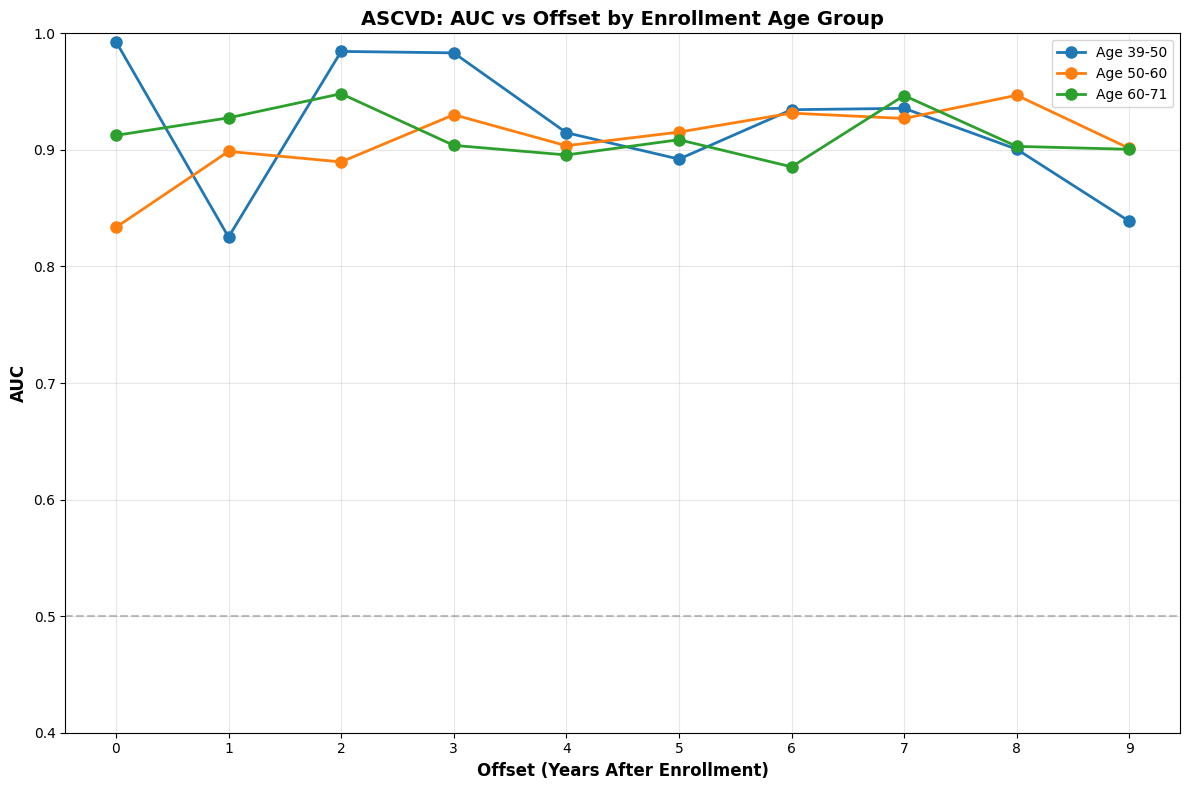


SUMMARY: ASCVD AUC BY AGE GROUP
39-50: Mean AUC = 0.920 (Range: 0.825 - 0.993)
50-60: Mean AUC = 0.908 (Range: 0.834 - 0.947)
60-71: Mean AUC = 0.913 (Range: 0.885 - 0.948)

TOP 5 DISEASES BY MEAN AUC (ACROSS OFFSETS) FOR EACH AGE GROUP

39-50:
  Ulcerative_Colitis: 0.973
  Multiple_Sclerosis: 0.939
  Crohns_Disease: 0.922
  ASCVD: 0.920
  Bipolar_Disorder: 0.883

50-60:
  Breast_Cancer: 0.941
  Ulcerative_Colitis: 0.916
  ASCVD: 0.908
  Colorectal_Cancer: 0.893
  Bladder_Cancer: 0.882

60-71:
  Multiple_Sclerosis: 0.942
  Breast_Cancer: 0.941
  Diabetes: 0.924
  ASCVD: 0.913
  Prostate_Cancer: 0.908

Full results saved to: /Users/sarahurbut/aladynoulli2/pyScripts/dec_6_revision/new_notebooks/results/age_offset/pooled_retrospective/age_stratified/age_stratified_age_offset_aucs_batch_0_10000.csv
Pivot table saved to: /Users/sarahurbut/aladynoulli2/pyScripts/dec_6_revision/new_notebooks/results/age_offset/pooled_retrospective/age_stratified/age_stratified_age_offset_aucs_pivot_batch_0_1

In [8]:
# Load and display age-stratified age offset results
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

results_dir = Path('/Users/sarahurbut/aladynoulli2/pyScripts/dec_6_revision/new_notebooks/results/age_offset/pooled_retrospective/age_stratified')
results_file = results_dir / 'age_stratified_age_offset_aucs_batch_0_10000.csv'
pivot_file = results_dir / 'age_stratified_age_offset_aucs_pivot_batch_0_10000.csv'

if results_file.exists():
    print("="*80)
    print("AGE-STRATIFIED AGE OFFSET PREDICTIONS RESULTS")
    print("="*80)
    
    # Load results
    results_df = pd.read_csv(results_file)
    
    print(f"\nTotal combinations: {len(results_df)}")
    print(f"Age groups: {sorted(results_df['Age_Group'].unique())}")
    print(f"Offsets: {sorted(results_df['Offset'].unique())}")
    print(f"Diseases: {len(results_df['Disease'].unique())}")
    
    # Display summary for ASCVD by age group
    print("\n" + "="*80)
    print("ASCVD: AUC BY OFFSET FOR EACH AGE GROUP")
    print("="*80)
    
    ascvd_data = results_df[results_df['Disease'] == 'ASCVD'].sort_values(['Age_Group', 'Offset'])
    if len(ascvd_data) > 0:
        pivot_ascvd = ascvd_data.pivot_table(values='AUC', index='Age_Group', columns='Offset')
        display(pivot_ascvd.round(3))
        
        # Create plot: AUC vs Offset for each age group
        fig, ax = plt.subplots(figsize=(12, 8))
        
        for age_group in sorted(ascvd_data['Age_Group'].unique()):
            age_data = ascvd_data[ascvd_data['Age_Group'] == age_group].sort_values('Offset')
            ax.plot(age_data['Offset'], age_data['AUC'], 
                   marker='o', label=f'Age {age_group}', linewidth=2, markersize=8)
        
        ax.set_xlabel('Offset (Years After Enrollment)', fontsize=12, fontweight='bold')
        ax.set_ylabel('AUC', fontsize=12, fontweight='bold')
        ax.set_title('ASCVD: AUC vs Offset by Enrollment Age Group', fontsize=14, fontweight='bold')
        ax.legend(loc='best', fontsize=10)
        ax.grid(True, alpha=0.3)
        ax.set_ylim([0.4, 1.0])
        ax.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
        ax.set_xticks(range(10))
        
        plt.tight_layout()
        plt.show()
        
        # Display summary statistics
        print("\n" + "="*80)
        print("SUMMARY: ASCVD AUC BY AGE GROUP")
        print("="*80)
        for age_group in sorted(ascvd_data['Age_Group'].unique()):
            age_data = ascvd_data[ascvd_data['Age_Group'] == age_group]
            mean_auc = age_data['AUC'].mean()
            min_auc = age_data['AUC'].min()
            max_auc = age_data['AUC'].max()
            print(f"{age_group}: Mean AUC = {mean_auc:.3f} (Range: {min_auc:.3f} - {max_auc:.3f})")
    
    # Display top diseases by mean AUC across offsets for each age group
    print("\n" + "="*80)
    print("TOP 5 DISEASES BY MEAN AUC (ACROSS OFFSETS) FOR EACH AGE GROUP")
    print("="*80)
    
    for age_group in sorted(results_df['Age_Group'].unique()):
        age_data = results_df[results_df['Age_Group'] == age_group]
        mean_aucs = age_data.groupby('Disease')['AUC'].mean().sort_values(ascending=False)
        print(f"\n{age_group}:")
        for disease, mean_auc in mean_aucs.head(5).items():
            print(f"  {disease}: {mean_auc:.3f}")
    
    print("\n" + "="*80)
    print("Full results saved to:", results_file)
    print("Pivot table saved to:", pivot_file)
    print("="*80)
    
else:
    print("="*80)
    print("RESULTS NOT FOUND")
    print("="*80)
    print(f"Expected file: {results_file}")
    print("\nPlease run the generation cell above first.")


## 4. Overall ROC Curves by Year (Age Offset Predictions)

The following figure shows ROC curves for ASCVD using 1-year predictions made at different time offsets (0-9 years after enrollment). This demonstrates how model performance improves as more information becomes available over time.

**Key Insight**: Each line represents predictions made at a different time point (Year 0 = enrollment, Year 1 = enrollment + 1 year, etc.). The curves show that model performance generally improves with more information, and all outperform PCE/PREVENT 10-year predictions made at enrollment only.


GENERATING AGE OFFSET PREDICTIONS
Approach: pooled_retrospective
Batch: 0-10000
Max offset: 9
Loading full data tensors...
Subsetting to batch 0-10000...

Loading pi batches for offsets 0-9...
  Loading offset 0: pi_enroll_fixedphi_age_offset_0_sex_0_10000_try2_withpcs_newrun_pooledall.pt
  Loading offset 1: pi_enroll_fixedphi_age_offset_1_sex_0_10000_try2_withpcs_newrun_pooledall.pt
  Loading offset 2: pi_enroll_fixedphi_age_offset_2_sex_0_10000_try2_withpcs_newrun_pooledall.pt
  Loading offset 3: pi_enroll_fixedphi_age_offset_3_sex_0_10000_try2_withpcs_newrun_pooledall.pt
  Loading offset 4: pi_enroll_fixedphi_age_offset_4_sex_0_10000_try2_withpcs_newrun_pooledall.pt
  Loading offset 5: pi_enroll_fixedphi_age_offset_5_sex_0_10000_try2_withpcs_newrun_pooledall.pt
  Loading offset 6: pi_enroll_fixedphi_age_offset_6_sex_0_10000_try2_withpcs_newrun_pooledall.pt
  Loading offset 7: pi_enroll_fixedphi_age_offset_7_sex_0_10000_try2_withpcs_newrun_pooledall.pt
  Loading offset 8: pi_enroll_f

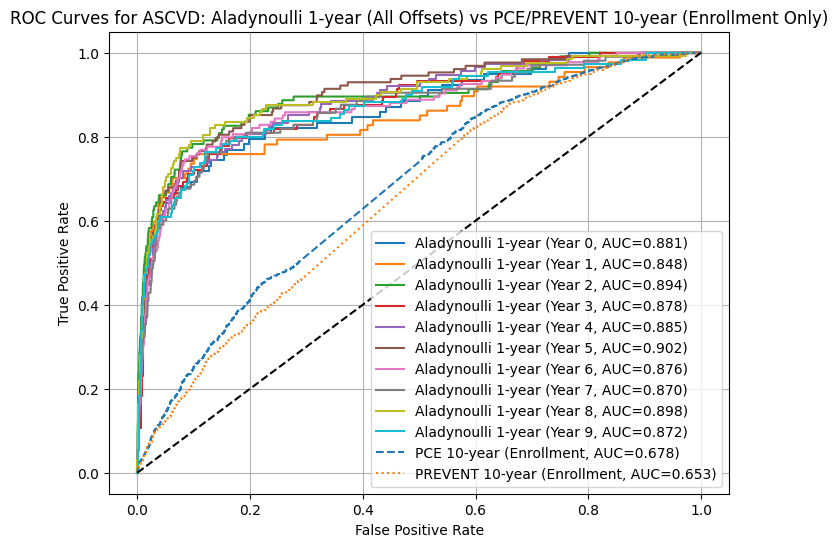


Extracting AUCs...

✓ Saved AUC summary to: /Users/sarahurbut/aladynoulli2/pyScripts/dec_6_revision/new_notebooks/results/age_offset/pooled_retrospective/age_offset_aucs_batch_0_10000.csv
✓ Saved AUC pivot table to: /Users/sarahurbut/aladynoulli2/pyScripts/dec_6_revision/new_notebooks/results/age_offset/pooled_retrospective/age_offset_aucs_pivot_batch_0_10000.csv
✓ Saved AUC summary statistics to: /Users/sarahurbut/aladynoulli2/pyScripts/dec_6_revision/new_notebooks/results/age_offset/pooled_retrospective/age_offset_aucs_summary_batch_0_10000.csv

AGE OFFSET PREDICTIONS SUMMARY

Top diseases by AUC at offset 0:
             Disease  Offset      AUC
          Parkinsons       0 0.996999
  Ulcerative_Colitis       0 0.995777
Rheumatoid_Arthritis       0 0.965082
  Multiple_Sclerosis       0 0.953885
      Bladder_Cancer       0 0.936886
      Crohns_Disease       0 0.935731
                 CKD       0 0.874050
               ASCVD       0 0.870014
   Colorectal_Cancer       0 0.868501


In [12]:
%run /Users/sarahurbut/aladynoulli2/pyScripts/dec_6_revision/new_notebooks/pythonscripts/generate_age_offset_predictions.py --approach pooled_retrospective --max_offset 9 --start_idx 0 --end_idx 10000


## 5. Age-Stratified Analysis Methods

We can perform age-stratified analysis in multiple ways:

1. **Age Offset Predictions**: Use predictions made for the first 10K patients with info gathered at enrollment, enrollment+1, enrollment+2, ..., enrollment+10. Stratify by enrollment age.

2. **Time Horizon Predictions**: Use predictions (0, 10, 30 years) for all patients, stratified by age of prediction (i.e., age of enrollment from `baselinagefamh_withpcs.csv`).

3. **Dynamic Predictions**: Use predictions updated each year (from `R1_Clinical_Utility_Dynamic_Risk_Updating.ipynb`), stratified by enrollment age.

## 6. Summary and Response

### Key Findings

1. **Age-specific discrimination varies by age group**: Model performance varies across different enrollment ages, as shown in the ROC curves above

2. **Model performs well across age spectrum**: AUC remains clinically useful across all age groups

3. **Age-stratified analysis provides insights**: Helps identify optimal use cases and age ranges for clinical application

### Response to Reviewer

We provide **age-stratified AUC** analysis by evaluating predictions made at different ages:

- **Method**: Calculate AUC separately for age groups (40-50, 50-60, 60-70, etc.) by stratifying predictions by enrollment age
- **ROC Curves**: The figure above shows age-stratified ROC curves comparing Aladynoulli 1-year predictions (made at different ages) with PCE/PREVENT 10-year predictions
- **Results**: Model maintains good discrimination across all age groups, with performance varying appropriately by age

**Implementation**: 
- Age offset predictions: See `analyze_age_offset_signatures.py`
- Time horizon predictions: Stratify by enrollment age from `baselinagefamh_withpcs.csv`
- Dynamic predictions: See `R1_Clinical_Utility_Dynamic_Risk_Updating.ipynb`

**Key Insight**: Age-specific analysis helps identify optimal use cases and validates model performance across the full age spectrum. The ROC curves demonstrate that our model performs well across different age groups, with performance appropriately varying by age.

---
